# 0 Introduction
The following exercise is based on Tarn Duong, ["An Introduction to Kernel Density Estimation."](https://www.mvstat.net/tduong/research/seminars/seminar-2001-05/) Run the code in the next cell, which loads a sample of the log wingspans of aircraft built from 1956 to 1984 (original wingspans were in meters). Assume the data are sampled from a continuous distribution with a bimodal density, where the peaks in the density represent the modal log wingspans of small and large aircraft respectively.

In [1]:
import numpy as np
wings = np.array([2.05, 2.20, 2.35, 2.40, 2.45, 2.60, 2.65, 2.70, 3.35, 3.40, 3.60, 3.90])

# 1 Histograms
Histograms are dependent on bin width as well as bin boundaries. Varying either of these can cause features of the distribution from which a sample is drawn to appear or to become obscured. With the present dataset, we may gain or lose the appearance of bimodality.
    
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.00, 1.50).
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.25, 1.75).

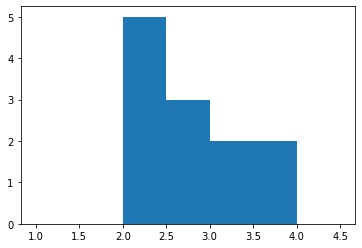

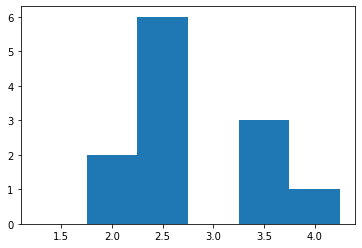

In [2]:
import matplotlib.pyplot as plt

# Histogram. Note the use of numpy.arange().
plt.hist(x=wings, bins=np.arange(1.00, 5.00, 0.50))
# Show this plot. Clears console for next plot.
plt.show()
plt.hist(x=wings, bins=np.arange(1.25, 4.75, 0.50))
plt.show()

# 2 Uniform Kernel Density Estimation
An advantage of kernel density estimation is that it does not depend on bin boundaries. It does however depend on bandwidth, which is an analogue of bin width.

- Manually implement a function that returns a uniform kernel density estimate given a vector of data and a bandwidth.
- Find a bandwidth that makes bimodality apparent and plot the results. State where the two modes appear to be.

1.0052910052910056

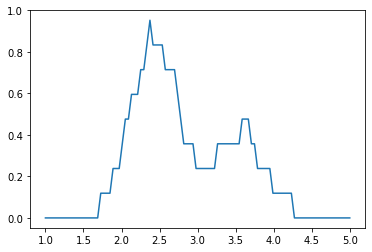

In [3]:
import scipy.stats as stat

# Concise lambda function implementing uniform kernel density estimation.
# This takes a sum of uniform PDF's that are scaled and centered according to the bandwidth and datapoints.
# The sum here is normalized by (1/(len(data)*bw)).
# Note that there are alternative, equivalent formulas.
# x: Points at which to evaluate the density estimate.
# data: Points on which to base the density estimate.
# bw: Bandwidth.
ukde = lambda x, data, bw: (1/(len(data)*bw)) * sum([stat.uniform.pdf((x - data[i])/bw, loc=-1, scale=2) \
                                for i in range(len(data))])

# Plot.
# x-axis.
x = np.linspace(1,5,100);
# Bandwidth.
bw = 0.35;
plt.plot(x, ukde(x, wings, bw))
# Modes around 2.5 and 3.5.

# Check that the density estimate integrates to unity.
np.trapz(ukde(x, wings, bw), x)

# 3 Gaussian Kernel Density Estimation

This part repeats 2. but with Gaussian kernels. An advantage of Gaussian kernels over uniform kernels is that they result in a smoother estimated density curve.

- Manually implement a function that returns a Gaussian kernel density estimate given a vector of data and a bandwidth.
- Find a bandwidth that makes bimodality apparent and plot the results. State where the two modes appear to be.

0.9999982977109592

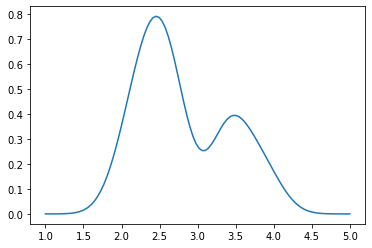

In [4]:
# Gaussian kernel density estimation.
gkde = lambda x, data, bw: (1/(len(data)*bw)) * sum([stat.norm.pdf((x - data[i])/bw, loc=0, scale=1) \
                                for i in range(len(data))])

#2 Plot
x = np.linspace(1,5,100);
# Bandwidth.
bw = 0.25
plt.plot(x, gkde(x, wings, bw))
# Modes around 2.5 and 3.5.

# Check that the density estimate integrates to unity.
np.trapz(gkde(x, wings, bw), x)

# 4 Rejection Sampling
We will now attempt to sample from the Gaussian kernel density estimate. Read the first two pages of [this paper](https://academic.oup.com/biomet/article/89/4/745/242234) up to algorithm 2, empirical supremum rejection sampling. Implement a procedure that performs empirical supremum rejection sampling on the Gaussian kernel density estimate and plots a histogram of the resulting sample. Tune the parameters of the procedure to get the histogram to resemble the Gaussian kernel density estimate.

452
2.3226133342323565


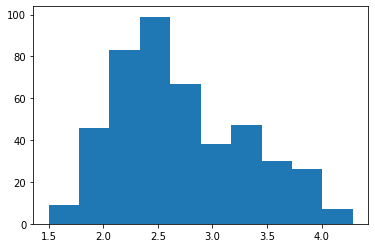

In [5]:
# Number of trials.
n = 1000

# n samples from a Uniform[0,1] distribution.
u = stat.uniform.rvs(size=n, random_state=0)

# The candidate distribution is chosen to be a mixture of two Gaussians to resemble the target distribution.
# Means of 2.5 and 3.5 are used to approximate the modes of the target distribution.
# Mixing probabilities of 2/3 and 1/3 are chosen to represent the relative sizes of the curves about the modes.
# With probability 2/3, draw from the first Gaussian, with probability 1/3 draw from the second.

# n samples from a candidate distribution.
# delta: Random variable representing whether draw is from first or second Gaussian.
delta = stat.bernoulli.rvs(2/3, size=n, random_state=0)
# x: The Gaussian mixture random variable.
x = delta*stat.norm.rvs(size=n, random_state=0, loc=2.5) + (1-delta)*stat.norm.rvs(size=n, random_state=0, loc=3.5) 

# Initialize container for samples.
samples = []
# Initialize supremum estimate.
c = 1 + 1e-16

# Sample.
for i in range(n):
    # Candidate PDF.
    cand = (2/3)*stat.norm.pdf(x[i], loc=2.5) + (1/3)*stat.norm.pdf(x[i], loc=3.5)
    # Ratio of target PDF to candidate PDF.
    ratio = gkde(x[i], wings, bw) / cand
    # Accept if a Uniform[0,1] random variable is <= ratio / c.
    if u[i] <= ratio / c:
        # Append to list of samples.
        samples.append(x[i])
    # Form new estimate of supremum.
    c = max(c, ratio)

# Plot histogram of samples.
plt.hist(samples)
# Number of samples.
print(len(samples))
# Supremum estimate.
print(c)

# Some features of the target distribution appear in the histogram.
# The procedure could be improved a better choice of candidate distribution.